Assignment 5

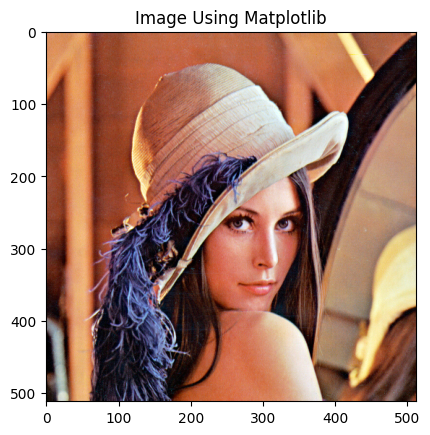

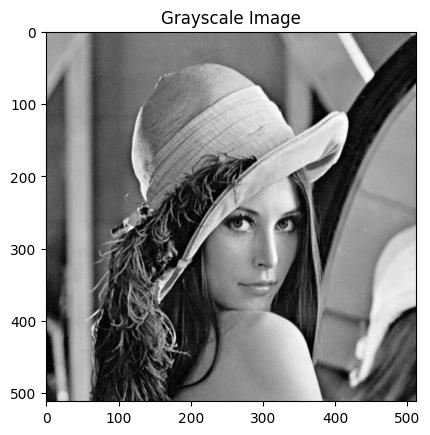

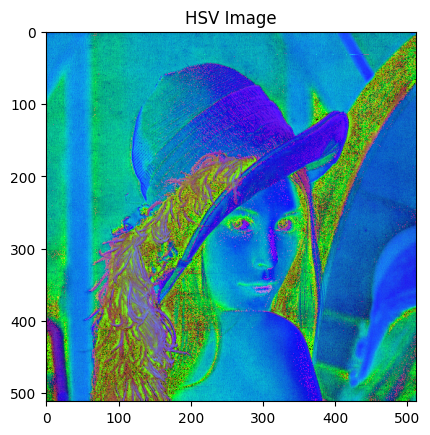

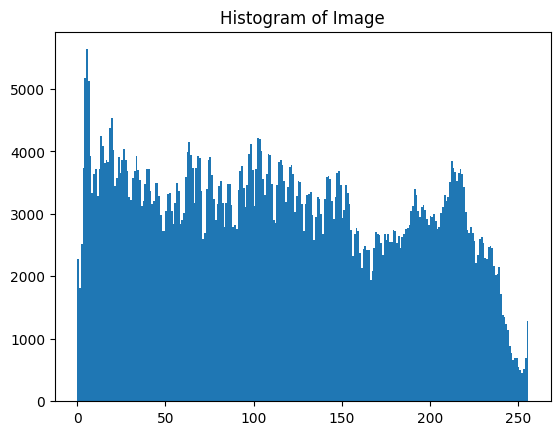

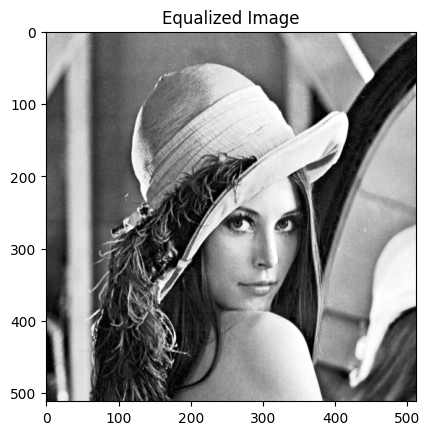

In [1]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

# 1. Reading an Image
url = '/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg'  # Replace with actual image URL
image = cv2.imread(url)  # Reading the image using OpenCV
image_pil = Image.open(url)  # Reading the image using PIL

# 2. Displaying an Image using OpenCV
# cv2.imshow('Original Image', image)
# cv2.waitKey(0)  # Wait until any key is pressed
# cv2.destroyAllWindows()

# 3. Displaying an Image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Converting BGR to RGB for display
plt.title('Image Using Matplotlib')
plt.show()

# 4. Saving an Image
cv2.imwrite('saved_image.jpg', image)  # Saving the image using OpenCV
image_pil.save('saved_image_pil.jpg')  # Saving the image using PIL

# 5. Converting to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# 6. Converting to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.title('HSV Image')
plt.show()

# 7. Image Histogram
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Histogram of Image')
plt.show()

# 8. Histogram Equalization (Contrast Adjustment)
equalized_image = cv2.equalizeHist(gray_image)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.show()


Assignment - 6

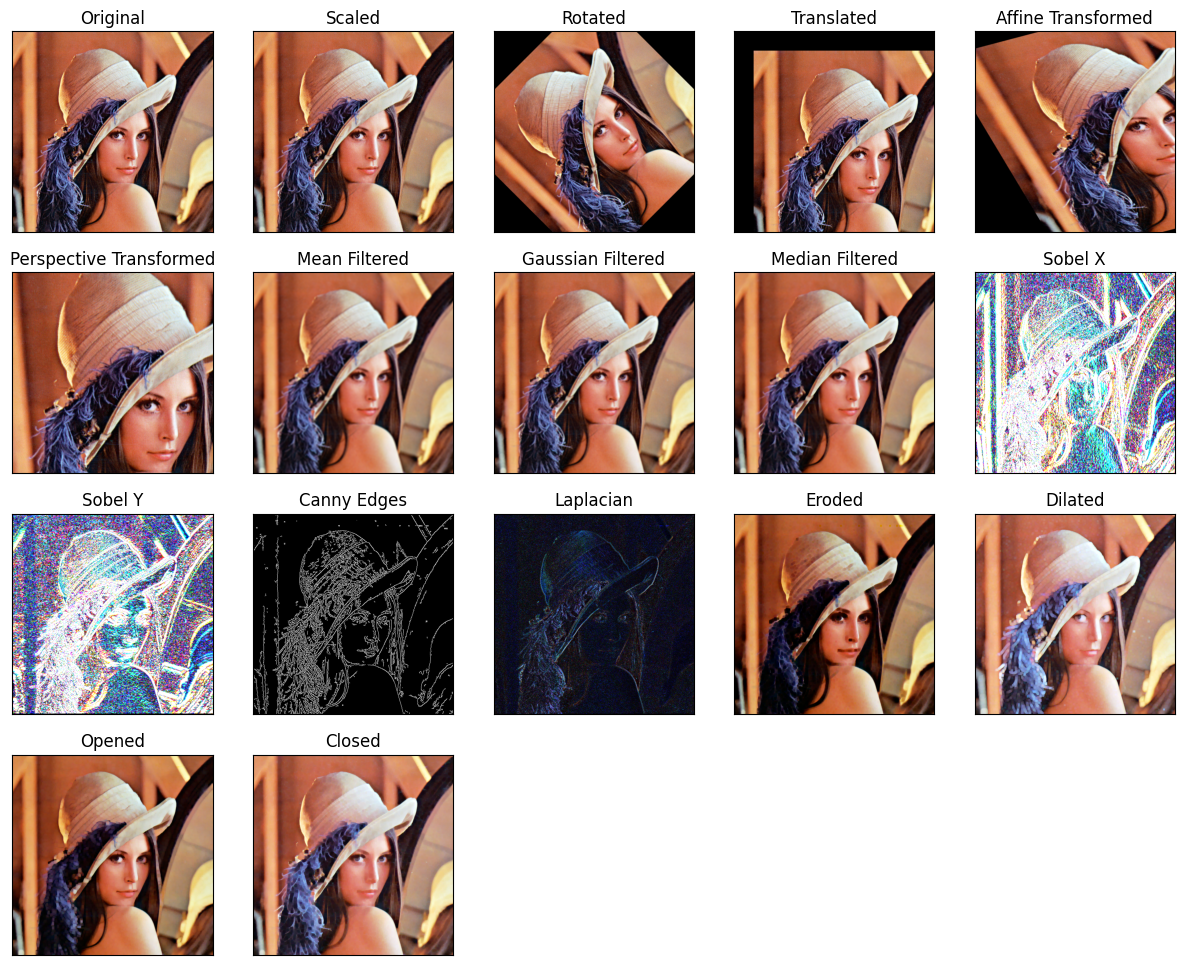

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (replace with your image path)
image = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg')

# Check if image is loaded correctly
if image is None:
    print("Error loading image")
else:
    # Convert image to 8-bit format if needed
    if image.dtype == np.float64 or image.dtype == np.float32:
        image = cv2.convertScaleAbs(image)

    # 1. Geometric Transformations
    scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5)

    # Rotation
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))

    # Translation
    M = np.float32([[1, 0, 50], [0, 1, 50]])  # Translate by 50px right and down
    translated_image = cv2.warpAffine(image, M, (w, h))

    # Affine Transformation
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    M = cv2.getAffineTransform(pts1, pts2)
    affine_transformed = cv2.warpAffine(image, M, (w, h))

    # Perspective Transformation
    pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
    pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    perspective_transformed = cv2.warpPerspective(image, M, (300, 300))

    # 2. Image Filtering

    # Mean Filter
    kernel = np.ones((5,5),np.float32)/25
    mean_filtered = cv2.filter2D(image, -1, kernel)

    # Gaussian Filter
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

    # Median Filter
    median_filtered = cv2.medianBlur(image, 5)

    # Sobel Edge Detection
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel in X direction
    sobelx = cv2.convertScaleAbs(sobelx)  # Convert to 8-bit
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel in Y direction
    sobely = cv2.convertScaleAbs(sobely)

    # Canny Edge Detection
    canny_edges = cv2.Canny(image, 100, 200)

    # Laplacian Edge Detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)

    # 3. Morphological Operations
    kernel = np.ones((5,5), np.uint8)

    # Erosion
    eroded = cv2.erode(image, kernel, iterations=1)

    # Dilation
    dilated = cv2.dilate(image, kernel, iterations=1)

    # Opening
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # Closing
    closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Display all the results
    titles = ['Original', 'Scaled', 'Rotated', 'Translated', 'Affine Transformed', 'Perspective Transformed',
              'Mean Filtered', 'Gaussian Filtered', 'Median Filtered', 'Sobel X', 'Sobel Y', 'Canny Edges', 'Laplacian',
              'Eroded', 'Dilated', 'Opened', 'Closed']

    images = [image, scaled_image, rotated_image, translated_image, affine_transformed, perspective_transformed,
              mean_filtered, gaussian_filtered, median_filtered, sobelx, sobely, canny_edges, laplacian, 
              eroded, dilated, opened, closed]

    plt.figure(figsize=(15, 12))
    for i in range(17):
        plt.subplot(4, 5, i+1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()


Global Thresholding

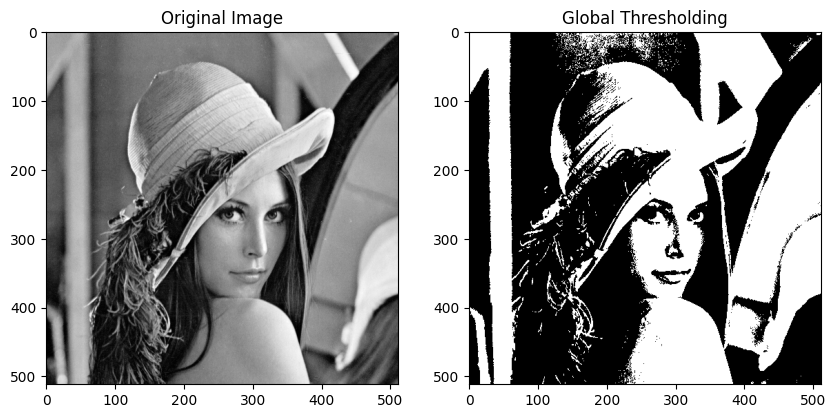

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image in grayscale
image = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg', 0)

# Apply global thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(global_thresh, cmap='gray'), plt.title('Global Thresholding')
plt.show()


Adaptive Thresholding

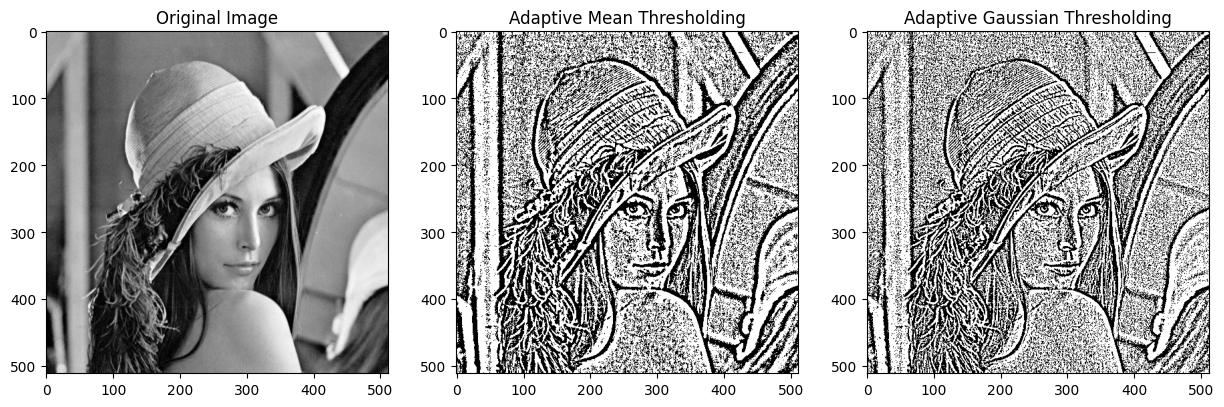

In [5]:
# Adaptive mean thresholding
adaptive_thresh_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

# Adaptive Gaussian thresholding
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(adaptive_thresh_mean, cmap='gray'), plt.title('Adaptive Mean Thresholding')
plt.subplot(1, 3, 3), plt.imshow(adaptive_thresh_gaussian, cmap='gray'), plt.title('Adaptive Gaussian Thresholding')
plt.show()


Otsu's Method

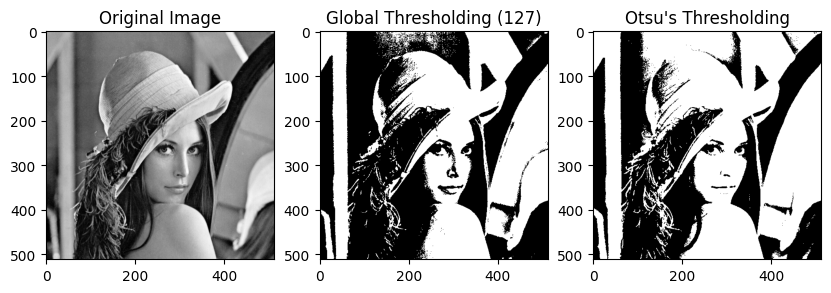

Otsu's threshold value: 107.0


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg', 0)

# Apply global thresholding with an arbitrary value (for comparison)
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding (127)')

plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")

plt.show()

# Display the optimal threshold value found by Otsu's method
print("Otsu's threshold value:", _)


Harris and Shi-Tomsai Cornor Detection

/tmp/ipykernel_41712/972140868.py:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)


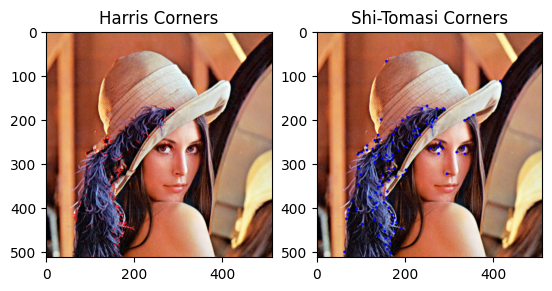

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_harris = np.float32(gray_image)
harris_corners = cv2.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)

# Resultant Harris corners are marked on the image
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.int0(shi_tomasi_corners)

image_shi_tomasi = image.copy()
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 3, [255, 0, 0], -1)

# Display Results
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB)), plt.title('Harris Corners')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB)), plt.title('Shi-Tomasi Corners')
plt.show()


SIFT and ORB

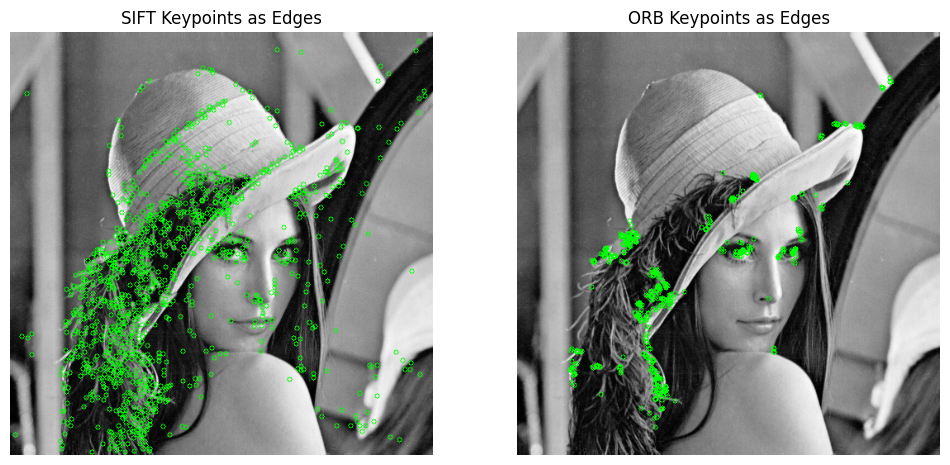

In [3]:
import cv2
import matplotlib.pyplot as plt

def draw_keypoints_edges(image, keypoints):
    """Draw keypoints as edges on the image."""
    img_with_edges = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for displaying
    for kp in keypoints:
        x, y = kp.pt
        cv2.circle(img_with_edges, (int(x), int(y)), 3, (0, 255, 0), 1)  # Draw circles as edges
    return img_with_edges

# Load image
img = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Find keypoints and descriptors for SIFT
kp_sift, _ = sift.detectAndCompute(img, None)
img_sift_edges = draw_keypoints_edges(img, kp_sift)

# Find keypoints and descriptors for ORB
kp_orb, _ = orb.detectAndCompute(img, None)
img_orb_edges = draw_keypoints_edges(img, kp_orb)

# Display the images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_sift_edges)
plt.title('SIFT Keypoints as Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_orb_edges)
plt.title('ORB Keypoints as Edges')
plt.axis('off')

plt.show()


Hough circle and Contour Detection

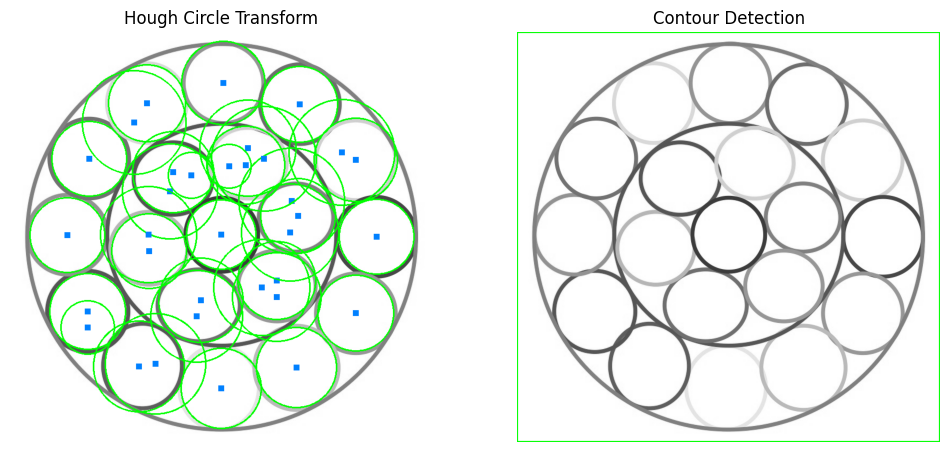

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circles(image):
    """Detect circles in an image using Hough Transform."""
    blurred = cv2.GaussianBlur(image, (9, 9), 2)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=100)
    
    img_with_circles = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(img_with_circles, (x, y), r, (0, 255, 0), 2)
            cv2.rectangle(img_with_circles, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    return img_with_circles

def detect_contours(image):
    """Detect contours in an image."""
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    img_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)
    return img_with_contours

# Load image
img = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/2e2cc6171dbfcf25dcf7ec5a9c321cc4b9b6e07a.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Hough Circle Transform
img_circles = detect_circles(img)

# Apply Contour Detection
img_contours = detect_contours(img)

# Display the images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_circles)
plt.title('Hough Circle Transform')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_contours)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


Texture Analysis 
Gabor Filter and Local Binary Pattern (LBP)

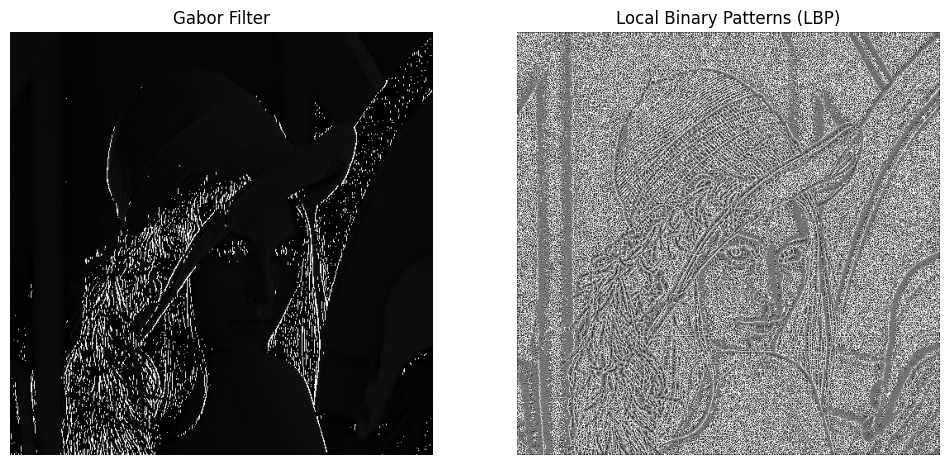

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage.feature import local_binary_pattern

def apply_gabor_filter(image):
    """Apply Gabor filter to the image."""
    real, imag = gabor(image, frequency=0.6)
    return real

def apply_lbp(image):
    """Apply Local Binary Patterns to the image."""
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    return lbp

# Load image
img = cv2.imread('/home/yashas/Desktop/l2m/SVIT_Faculty_training/ML/story_lena_lenna_1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gabor filter
img_gabor = apply_gabor_filter(img)

# Apply LBP
img_lbp = apply_lbp(img)

# Display the images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gabor, cmap='gray')
plt.title('Gabor Filter')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_lbp, cmap='gray')
plt.title('Local Binary Patterns (LBP)')
plt.axis('off')

plt.show()